<a href="https://colab.research.google.com/github/salina-nakarmi/Recommendo/blob/Saksham/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [5]:
df = pd.read_csv("final_processed.csv")

# **DATA INSPECTION PHASE**

During this phase we looked upon how many feature we have and how many different entrys of books do we have

In [4]:
df.head(5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,Average-Book-Rating,Rating-Count,Dominant-Age-Group,Genre,Description
0,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,4.93,14,25-34,Actresses,"In a small town in Canada, Clara Callan reluct..."
1,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,4.21,33,35-44,Fiction,An absorbing narrative of Winnie Louie's life.
2,0440234743,The Testament,John Grisham,1999,Dell,http://images.amazon.com/images/P/0440234743.0...,3.09,422,25-34,Fiction,Heart of darkness... In a plush Virginia offic...
3,0452264464,Beloved (Plume Contemporary Fiction),Toni Morrison,1994,Plume,http://images.amazon.com/images/P/0452264464.0...,3.41,180,25-34,Fiction,WINNER OF THE NOBEL PRIZE IN LITERATURE.
4,0609804618,Our Dumb Century: The Onion Presents 100 Years...,The Onion,1999,Three Rivers Press,http://images.amazon.com/images/P/0609804618.0...,5.68,19,25-34,Humor,The Onion has quickly become the world's most ...


In [6]:
df.shape

(13567, 11)

So there are total of 13567 rows and 11 different features

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13567 entries, 0 to 13566
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ISBN                 13567 non-null  object 
 1   Book-Title           13567 non-null  object 
 2   Book-Author          13567 non-null  object 
 3   Year-Of-Publication  13567 non-null  int64  
 4   Publisher            13567 non-null  object 
 5   Image-URL-M          13567 non-null  object 
 6   Average-Book-Rating  13567 non-null  float64
 7   Rating-Count         13567 non-null  int64  
 8   Dominant-Age-Group   13567 non-null  object 
 9   Genre                13567 non-null  object 
 10  Description          13567 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 1.1+ MB


From the above observation we can see that non of the value is missing in any of the column and the data type of all the feature is also correct.


In [8]:
df["ISBN"].duplicated().sum()

np.int64(0)

Based on ISBN Number there are not any duplicate value but we also need to check if there are any duplicate values in Book Title lets do this now

In [9]:
df["Book-Title"].duplicated().sum()

np.int64(1512)

Though we have no duplicate ISBN, 1512 books are duplicated it is because same book is published in different years, that are the revised version. Now lets see what we can we do with this duplicated books.

In [10]:
duplicate_percentage = (df["Book-Title"].duplicated().sum()/len(df["Book-Title"]))*100
duplicate_percentage

np.float64(11.144689319672734)

In [11]:
df.drop_duplicates(subset = "Book-Title" , keep = "first", inplace = True)

As 11% of books are duplicate it will affect our modeling so we will handel this in model building phase of our project. Now rest of the features are categorical feature so we can have duplicate values there

In [12]:
top_20_frequent_authors = df["Book-Author"].value_counts().head(10)
top_20_frequent_authors

,count
Book-Author,
Nora Roberts,102
Stephen King,81
R. L. Stine,76
V.C. Andrews,65
Anne McCaffrey,54
Sandra Brown,50
Catherine Coulter,49
Piers Anthony,49
Mary Higgins Clark,44


**Let Do some Intereisting Analyis:: Counting Author Name Starting form each letter**

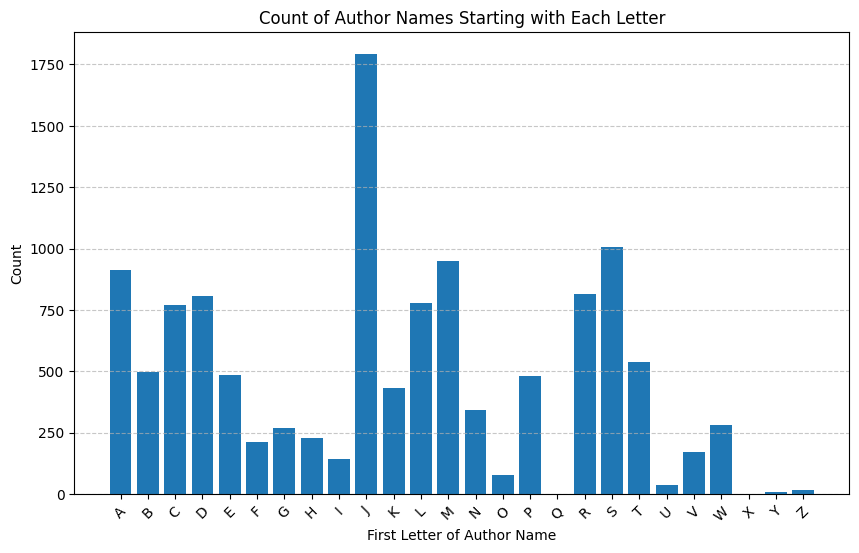

In [12]:
import string

# Disctonory to hold counts
author_counts_by_letter = {}

# Loop through A to Z
for letter in string.ascii_uppercase:
    count = df["Book-Author"].str.strip().str.upper().str.startswith(letter).sum()
    author_counts_by_letter[letter] = count

# Creating Bar chart
plt.figure(figsize=(10, 6))
plt.bar(author_counts_by_letter.keys(), author_counts_by_letter.values())
plt.xlabel("First Letter of Author Name")
plt.ylabel("Count")
plt.title("Count of Author Names Starting with Each Letter")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


The distribution analysis of author name initials reveals that names starting with the letter 'J' are the most common in the dataset, with approximately 2000 occurrences. This is followed by authors whose names start with 'S' (~1200), 'M' (~1000), and 'A' (~1000). The high frequency of the letter 'J' likely reflects the popularity of names such as John, James, Jane, and Jennifer, which are common in English-speaking regions. This trend may also indicate cultural or demographic biases present in the dataset. Such insights are valuable for understanding the composition of the data and can support further tasks like author-based grouping, feature engineering, or bias detection in modeling.

In [13]:
bins = np.arange(1920, 2011, 10) # Creating the array starting from 1920 to 2011(exclusicve) of 10 gap
labels = [f"{start}-{start+10}" for start in bins[:-1]] # This is called the list comprehension
df["Publisher_year_bins"] = pd.cut(df["Year-Of-Publication"], bins=bins, labels=labels, right=False) # Divides the contineous data into discrete bins

In [15]:
df["Publisher_year_bins"].value_counts().head(10)

,count
Publisher_year_bins,
1990-2000,6048
2000-2010,4302
1980-1990,1319
1970-1980,183
1960-1970,40
1950-1960,26
1920-1930,3
1930-1940,2
1940-1950,2


From the above data we can say that the dataset is old. It mostly include the books Publised in last years of 20th Century and early partt of 21st Centure. And the book published in recent year is missing.

# **BAR CHART SHOWING THE NO OF BOOKS PUBLISHED EACH YEARS INTERVAL** bold text

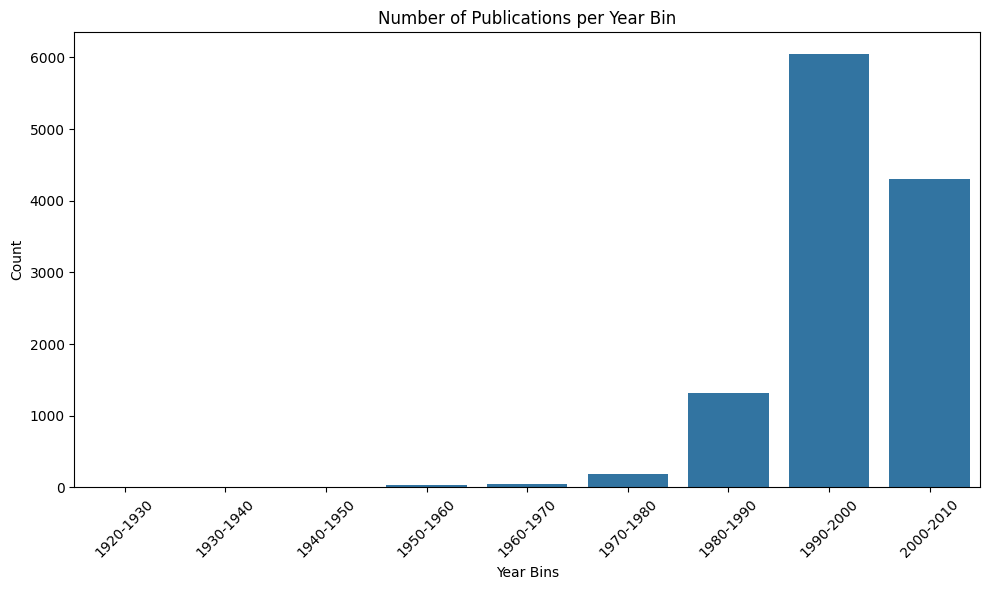

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Publisher_year_bins")
plt.xticks(rotation=45)
plt.title("Number of Publications per Year Bin")
plt.xlabel("Year Bins")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# **BAR CHART SHOWING THE DIFFERENT GENRES OF BOOK PUBLISHED IN EACH YEAR INTERVAL**

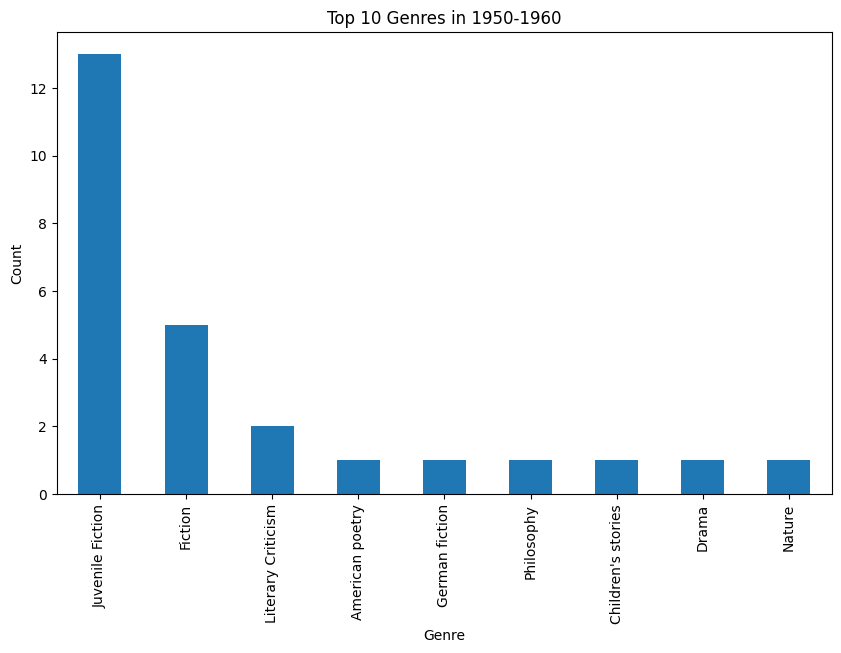

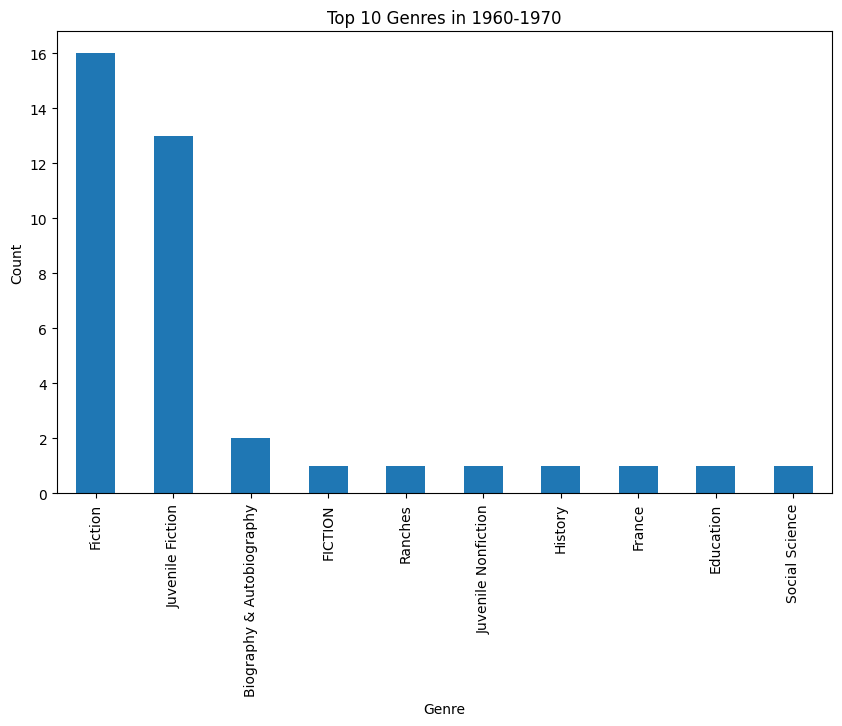

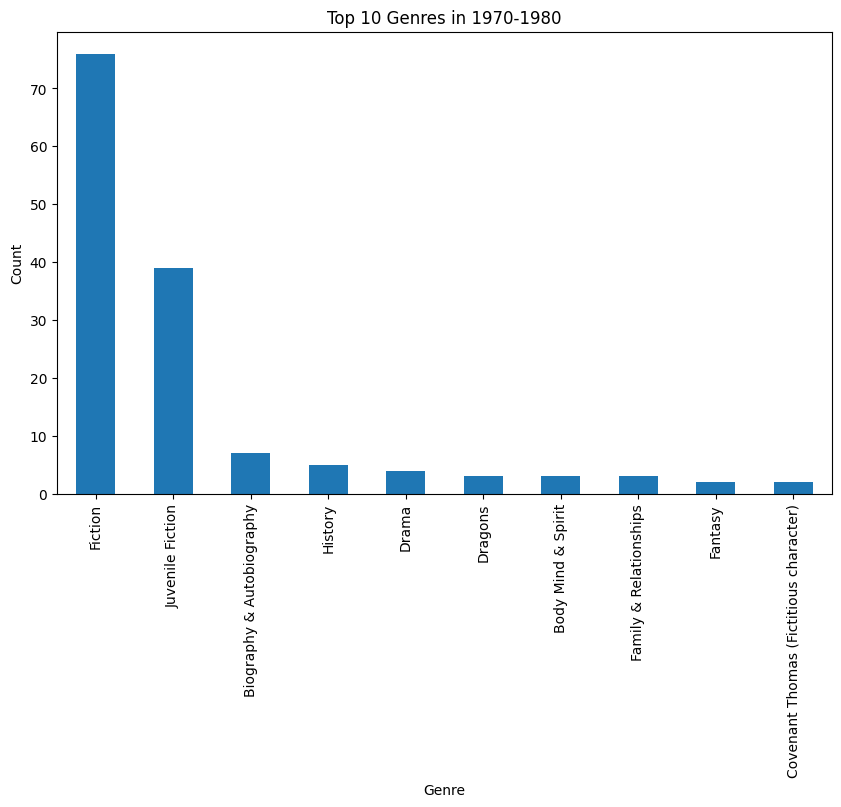

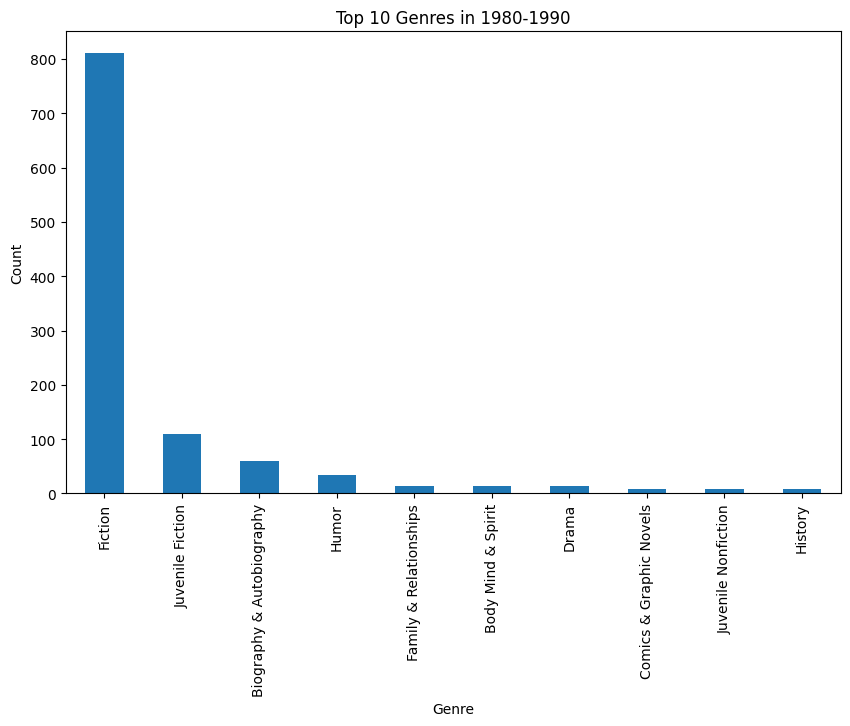

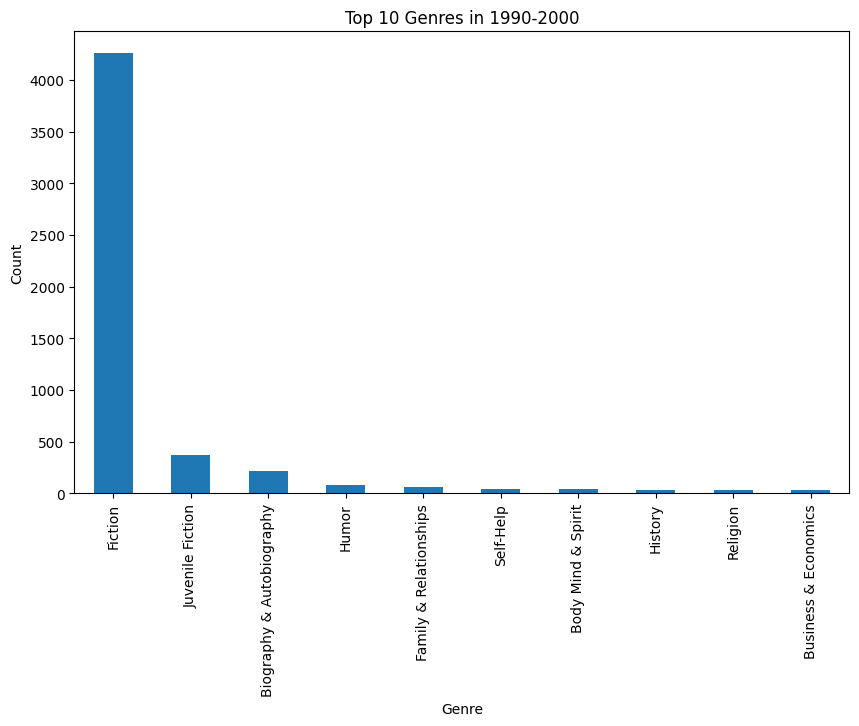

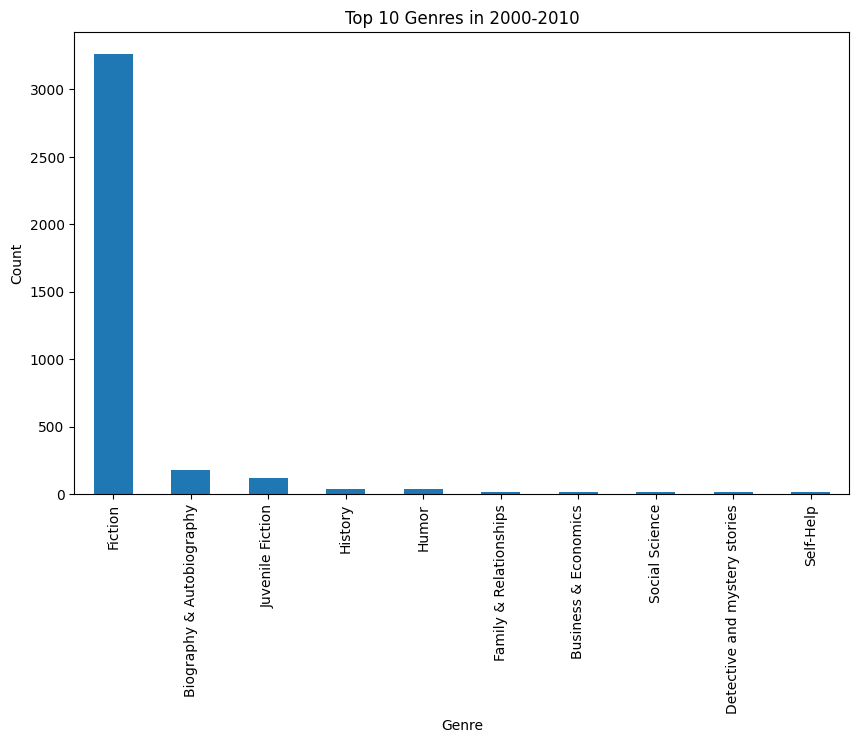

In [17]:
for i in range(len(labels)):
  if i < 3 :
    continue
  new_df = df[df["Publisher_year_bins"] == labels[i]]
  top_genres = new_df["Genre"].value_counts().head(10)
  top_genres.plot(kind="bar", figsize=(10, 6))
  plt.title(f"Top 10 Genres in {labels[i]}")
  plt.xlabel("Genre")
  plt.ylabel("Count")
  plt.show()

In [18]:
df["Publisher"].value_counts()

,count
Publisher,
Pocket,503
Ballantine Books,475
Avon,440
Berkley Publishing Group,423
Bantam,362
...,...
Unknown,1
Du Palemon,1
Worldwide Library,1


The data shows that a few publishers like Pocket and Ballantine Books dominate the dataset with over 500 books each, while many others appear only once. This uneven distribution likely reflects market realities, where large publishers produce and distribute far more titles, and smaller publishers have limited releases. It also suggests the dataset may be biased toward popular or widely available books from major publishers.



In [32]:
df["Average-Book-Rating"].value_counts().head(5)

,count
Average-Book-Rating,
3.00,189
2.00,178
4.00,96
2.50,84
2.33,77


# **Basic Statistics of Description**

In [43]:
no_wordss = []
# This is a function that
for i in range(len(df["Description"])):
  text = df["Description"].iloc[i]
  words = text.split()
  no_wordss.append(len(words))

In [52]:
print("Counts", len(no_wordss))
print("Mean",statistics.mean(no_wordss))
print("Median",statistics.median(no_wordss))
print("Mode",statistics.mode(no_wordss))
print("Standard Deviation",statistics.stdev(no_wordss))
print("min",min(no_wordss))
print("max",max(no_wordss))

Counts 12055
Mean 83.89365408544172
Median 48
Mode 15
Standard Deviation 83.23459705585014
min 1
max 2709


The majority of books rating are clusterd aorund the average value 2 to 3 whcih is moderate reviews. From this one what we can conclude is that most most the books in out data set are less popular Books.

In [ ]:
(df["Rating-Count"] > 100).sum()

np.int64(553)

Out of total of more then 10000 books only 664 books were reated by more then 100 reader which suggest that we do not have enought rating data for each book. This imbalacne can create significant challenges for building CF. As CF relies on USER-item interactions, like rating to find the patterns between users and items.
Most books have very few ratings (as in your case — only 664 out of 10,000 books have >100 ratings),It leads to a sparse rating matrix (mostly empty), Which makes it hard for CF to find meaningful similarities between books or users. For books with few or no ratings, CF can’t recommend them effectively. Bias Toward Popular Books: Recommendations will mostly feature frequently rated (popular) books, ignoring long-tail content. Lower Model Accuracy: Not enough overlapping user preferences leads to noisy or weak similarity signals.





In [ ]:
df["Rating-Count"].value_counts().head(10)

,count
Rating-Count,
12,1115
13,986
14,815
15,683
16,559
17,528
18,461
11,461
19,405


From this what we can conclude is that Most of the books are rated by 11 to 20 user.

In [ ]:
df["Genre"].value_counts()

,count
Genre,
Fiction,8473
Juvenile Fiction,676
Biography & Autobiography,478
Humor,149
Family & Relationships,98
...,...
Criminal investigation,1
Women lawyers,1
Explorers,1


In [ ]:
((df["Genre"] == "Fiction").value_counts().head(1).values/len(df["Genre"]))*100

array([70.2861883])

More then 70% of the data belongs to fiction, Since fiction dominates the dataset, the recommender may tend to over recommend fiction books.
Genres with fewer examples (e.g., Criminal Investigation, Business Intelligence) may be under-represented and thus rarely recommended.

# **GRAPH SHOWING THE REALTIONSHIP BETWEEN RATINGS AND REVIEW COUNTS BEFORE ADUJUSTING THE RANGE**

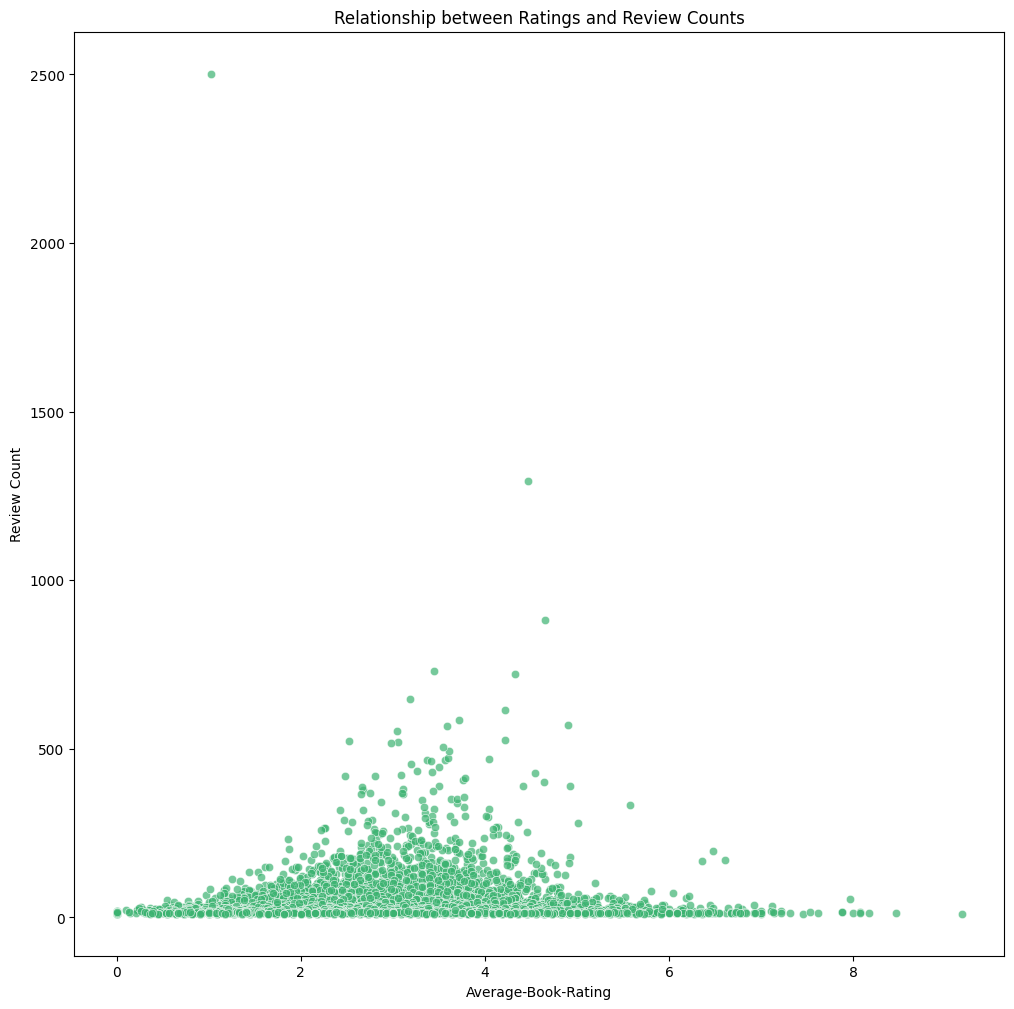

In [ ]:
plt.figure(figsize=(12, 12))
sns.scatterplot(data=df, x='Average-Book-Rating', y='Rating-Count', alpha=0.7, color='mediumseagreen')
plt.title('Relationship between Ratings and Review Counts')
plt.xlabel('Average-Book-Rating')
plt.ylabel('Review Count')
plt.show()

Based on the scatter plot showing the relationship between 'Average-Book-Rating' and 'Rating-Count', here's an interpretation:

The plot shows a concentration of points towards the lower end of the 'Rating-Count' axis. This indicates that most books in the dataset have a relatively low number of ratings. There are fewer points as the 'Rating-Count' increases, suggesting that only a smaller number of books have received a high volume of ratings.

Regarding the 'Average-Book-Rating', the points are spread across the range of ratings, but it appears there might be a slight tendency for books with higher rating counts to also have a wider spread of average ratings, although the majority still seem to be clustered in the middle range.

Overall, the plot reinforces the earlier observation that the dataset is sparse in terms of ratings, with a large number of books having very few reviews. This uneven distribution of ratings, where a few books have many ratings and most have very few, is clearly visible in the scatter plot.

In [ ]:
# Highest frequency of Average-Book-Rating
highest_freq_rating = df["Average-Book-Rating"].value_counts().idxmax()
count_of_highest_freq_rating = df["Average-Book-Rating"].value_counts().max()

print(f"The average book rating with the highest frequency is: {highest_freq_rating}")
print(f"It appears {count_of_highest_freq_rating} times in the dataset.")

The average book rating with the highest frequency is: 3.0
It appears 189 times in the dataset.


In [ ]:
# Get the row with the maximum Rating-Count
book_with_highest_rating_count = df.loc[df['Rating-Count'].idxmax()]

print("Book with the highest Rating-Count:")
print(book_with_highest_rating_count[['Book-Title', 'Rating-Count','Average-Book-Rating']])

Book with the highest Rating-Count:
Book-Title             Wild Animus
Rating-Count                  2502
Average-Book-Rating           1.02
Name: 6, dtype: object


In [ ]:
books_less_than_5 = df[df['Average-Book-Rating'] < 5]
num_books_less_than_5 = len(books_less_than_5)
percentage_books_less_than_5 = (num_books_less_than_5 / len(df)) * 100

print(f"Number of books with Average-Book-Rating less than 5: {num_books_less_than_5}")
print(f"Percentage of books with Average-Book-Rating less than 5: {percentage_books_less_than_5:.2f}%")

Number of books with Average-Book-Rating less than 5: 11571
Percentage of books with Average-Book-Rating less than 5: 95.99%


here we can see the books having less than rating of 5 is 95.87% so the rating might be in the scale of 5 with some data ( may be error ) having more than 5


In [ ]:
book_more_than_5 = df[df['Average-Book-Rating'] > 5]
num_books_more_than_5 = len(book_more_than_5)
percentage_books_more_than_5 = (num_books_more_than_5 / len(df)) * 100

print(f"Number of books with Average-Book-Rating more than 5: {num_books_more_than_5}")
print(f"Percentage of books with Average-Book-Rating more than 5: {percentage_books_more_than_5:.2f}%")

Number of books with Average-Book-Rating more than 5: 452
Percentage of books with Average-Book-Rating more than 5: 3.75%


In [ ]:
df['Average-Book-Rating'] = df['Average-Book-Rating'].clip(upper=5)

so as the dataset had about 95% of the books wirh rating less than 5 so we are assuming that the rating range is 5 and the outliers (ratings greater than 5) we are clipping them.

In [ ]:
books_0 = df[df['Average-Book-Rating'] == 0]
num_books_0 = len(books_0)
percentage_books_0 = (num_books_0 / len(df)) * 100

print(f"Number of books with Average-Book-Rating with rating 0: {num_books_0}")
print(f"Percentage of books with Average-Book-Rating less than 5: {percentage_books_0:.2f}%")

Number of books with Average-Book-Rating with rating 0: 66
Percentage of books with Average-Book-Rating less than 5: 0.55%


the numbers books having average rating 0 is 68 with 0.5% this has two meaning either these books are not rated at all or these books have been rated 0 by the users



In [ ]:
# Filter for books with Average-Book-Rating equal to 0 and Rating-Count equal to 0
books_zero_rating_zero_count = df[(df['Average-Book-Rating'] == 0) & (df['Rating-Count'] == 0)]

# Get the number of such books
num_books_zero_rating_zero_count = len(books_zero_rating_zero_count)

print(f"Number of books with Average-Book-Rating 0 and Rating-Count 0: {num_books_zero_rating_zero_count}")

Number of books with Average-Book-Rating 0 and Rating-Count 0: 0


so this concludes that the book was rated 0 , they are rated but rated 0 by the users.

# **GRAPH SHOWING RELATIONSHIP BETWEEN RATINGS AND REVIEW COUNTS AFTER ADJUSTING THE RANGE TO 0-5**

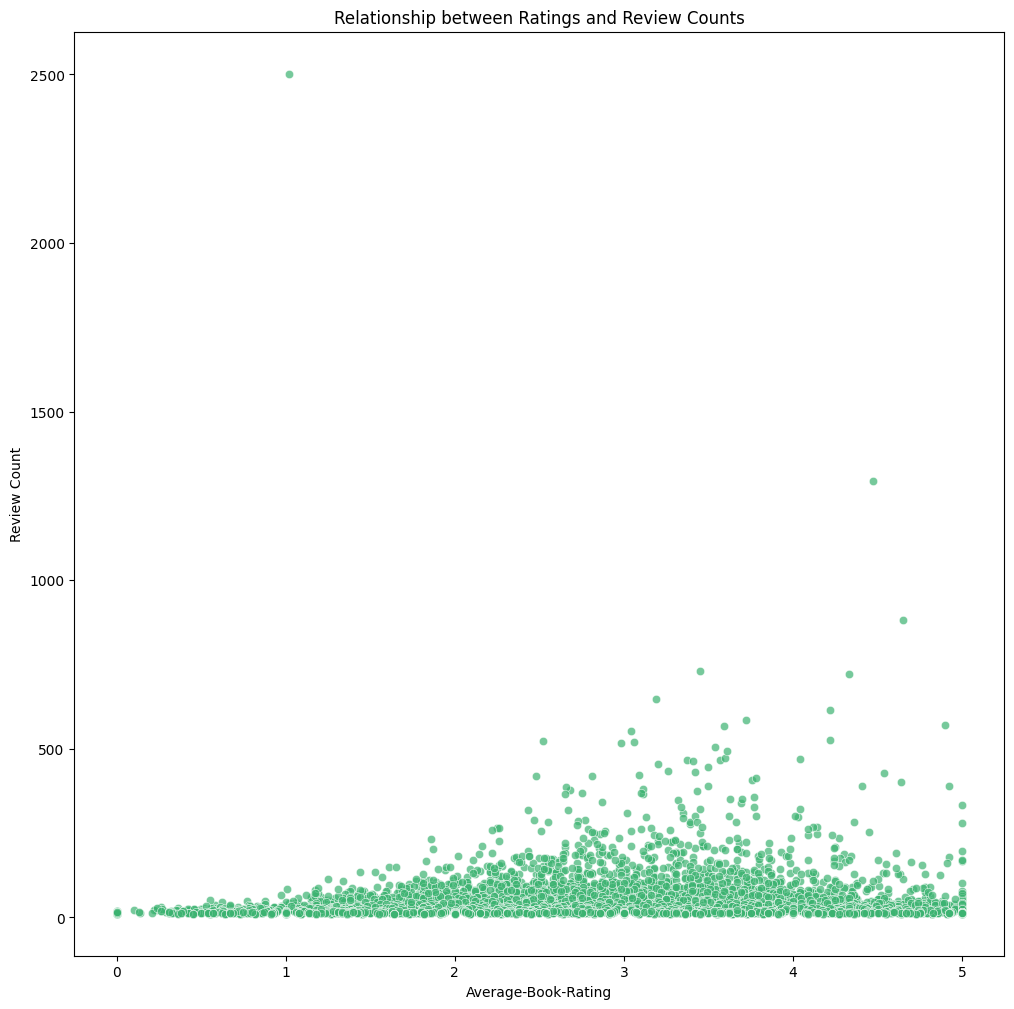

In [ ]:
plt.figure(figsize=(12, 12))
sns.scatterplot(data=df, x='Average-Book-Rating', y='Rating-Count', alpha=0.7, color='mediumseagreen')
plt.title('Relationship between Ratings and Review Counts')
plt.xlabel('Average-Book-Rating')
plt.ylabel('Review Count')
plt.show()

now with the change in the Average-Book-Rating the difference can be seen in this book-rating and review-count relation as well. So before most of the data was concentrated around 2-4 now it has spread out as well and we can see that the book having higher rating also has has higher review-count as well.

In [ ]:
# Sort the dataframe by 'Average-Book-Rating' in descending order
books_with_highest_rating = df.sort_values(by='Average-Book-Rating', ascending=False)

# Print the top few books with the highest average rating
print("Books with the highest Average-Book-Rating:")
print(books_with_highest_rating[['Book-Title', 'Average-Book-Rating', 'Rating-Count']].head())

Books with the highest Average-Book-Rating:
                                              Book-Title  Average-Book-Rating  \
4979            Romeo and Juliet (Dover Thrift Editions)                  5.0   
6353   The Gryphon: In Which the Extraordinary Corres...                  5.0   
4090                              To the Edge of the Sky                  5.0   
4102                                   A Little Princess                  5.0   
12599                              The Santaroga Barrier                  5.0   

       Rating-Count  
4979             15  
6353             15  
4090             12  
4102             18  
12599            11  


In [ ]:
# Sort the dataframe by 'Rating-Count' in descending order
books_with_highest_review_count = df.sort_values(by='Rating-Count', ascending=False)

# Print the top 20 books with the highest review count
print("Top 20 books with the highest review count:")
print(books_with_highest_review_count[['Book-Title', 'Rating-Count', 'Average-Book-Rating']].head(20))

Top 20 books with the highest review count:
                                             Book-Title  Rating-Count  \
6                                           Wild Animus          2502   
201                           The Lovely Bones: A Novel          1295   
362                                   The Da Vinci Code           883   
533     Divine Secrets of the Ya-Ya Sisterhood: A Novel           732   
252                 The Red Tent (Bestselling Backlist)           723   
156                                     A Painted House           647   
178                             The Secret Life of Bees           615   
54                                  Angels &amp; Demons           586   
1012  Harry Potter and the Sorcerer's Stone (Harry P...           571   
2057                         The Pilot's Wife : A Novel           568   
1901                              House of Sand and Fog           552   
115                           Girl with a Pearl Earring           526   
1126   

from this we can see the books with higher rating-count has higher rating in average although the highest book with highest rating-count has very low rating

# **BAR GRAPH WITH AVERAGE RATING COUNT PER DECADE**

/tmp/ipython-input-857943761.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_count_by_year = df.groupby('Publisher_year_bins')['Rating-Count'].mean().reset_index()


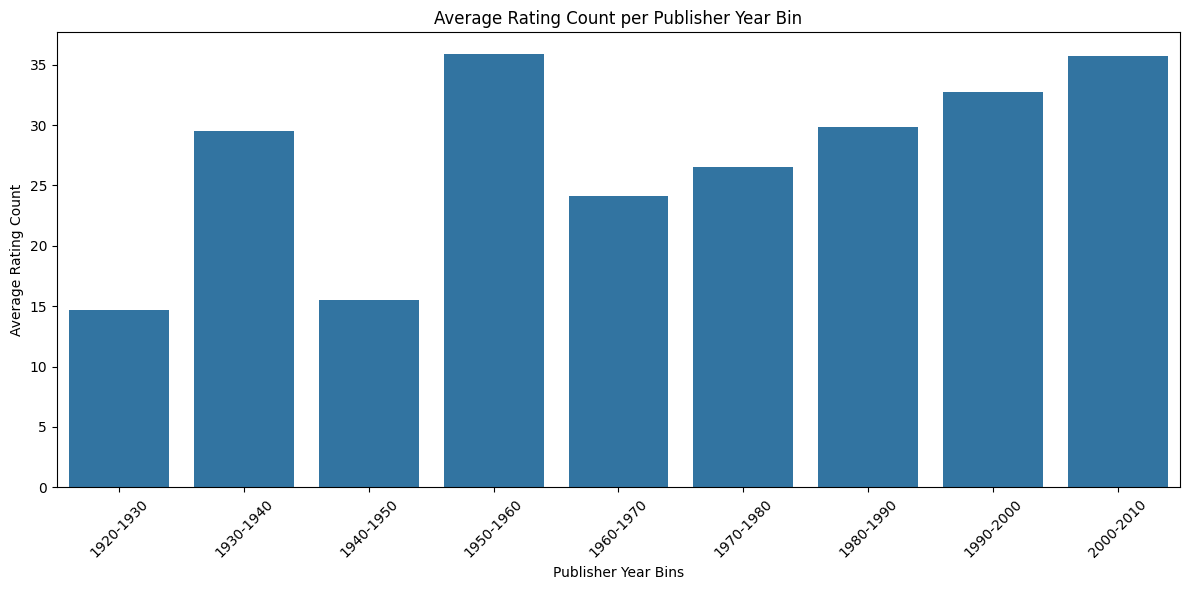

In [ ]:
bins = np.arange(1920, 2011, 10)
labels = [f"{start}-{start+10}" for start in bins[:-1]]
df["Publisher_year_bins"] = pd.cut(df["Year-Of-Publication"], bins=bins, labels=labels, right=False)

# Analyze books by publisher year bins and their average rating-count
# Group by the publisher year bins and calculate the mean of 'Rating-Count'
avg_rating_count_by_year = df.groupby('Publisher_year_bins')['Rating-Count'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_rating_count_by_year, x='Publisher_year_bins', y='Rating-Count')
plt.title('Average Rating Count per Publisher Year Bin')
plt.xlabel('Publisher Year Bins')
plt.ylabel('Average Rating Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Interpretation: This plot shows the average number of ratings for books published in different ten-year bins. It helps understand if books from certain time periods tend to receive more ratings on average.

Although there is no certain trend that we can analyze but in the recent years since 1960 the book rating count is increasing steadily here also the books from 1930s and 1950s have higher rating count


In [ ]:
# Filter books from the 1930s and 1950s
books_1930s = df[df["Publisher_year_bins"] == "1930-1940"]
books_1950s = df[df["Publisher_year_bins"] == "1950-1960"]

print("Books from the 1930s:")
print(books_1930s[['Book-Title', 'Year-Of-Publication', 'Rating-Count', 'Average-Book-Rating']].head())

print("\nBooks from the 1950s:")
print(books_1950s[['Book-Title', 'Year-Of-Publication', 'Rating-Count', 'Average-Book-Rating']].head())

Books from the 1930s:
                                              Book-Title  Year-Of-Publication  \
4287   The Secret of the Old Clock (Nancy Drew Myster...                 1930   
11048  The Clue in the Diary (Nancy Drew Mystery Stor...                 1932   

       Rating-Count  Average-Book-Rating  
4287             45                 4.04  
11048            14                 2.36  

Books from the 1950s:
                                             Book-Title  Year-Of-Publication  \
812                 Howl and Other Poems (Pocket Poets)                 1956   
833                                   Lord of the Flies                 1959   
1342               Cyrano De Bergerac (Bantam Classics)                 1950   
1647                                 The Cat in the Hat                 1957   
1735  Cat in the Hat (I Can Read It All by Myself Be...                 1957   

      Rating-Count  Average-Book-Rating  
812             19                 5.00  
833            23

So looking at the books by themselves it is quite obvious that the average rating-count is higher as they are popular books.

In [ ]:
# Filter books published in the 2000s (2000 to 2009 inclusive)
books_2000s = df[(df['Year-Of-Publication'] >= 2000) & (df['Year-Of-Publication'] <= 2009)]

print("Books from the 2000s:")
print(books_2000s[['Book-Title', 'Year-Of-Publication', 'Rating-Count', 'Average-Book-Rating']].head())

Books from the 2000s:
                                          Book-Title  Year-Of-Publication  \
0                                       Clara Callan                 2001   
5  New Vegetarian: Bold and Beautiful Recipes for...                 2001   
6                                        Wild Animus                 2004   
8                                           Timeline                 2000   
9                                   Prague : A Novel                 2003   

   Rating-Count  Average-Book-Rating  
0            14                 4.93  
5            37                 2.00  
6          2502                 1.02  
8           407                 3.76  
9            27                 3.41  


So the book with highest rating-count is of this time (the 2000s) so obviously this timeline will have higher average rating count

In [ ]:
# Sort the dataframe by 'Rating-Count' in descending order
books_with_highest_rating_count = df.sort_values(by='Rating-Count', ascending=False)

# Print the top 20 books with the highest review count
print("Top 20 books with the highest rating count:")
print(books_with_highest_rating_count[['Book-Title', 'Rating-Count', 'Average-Book-Rating']].head(20))


Top 20 books with the highest rating count:
                                             Book-Title  Rating-Count  \
6                                           Wild Animus          2502   
201                           The Lovely Bones: A Novel          1295   
362                                   The Da Vinci Code           883   
533     Divine Secrets of the Ya-Ya Sisterhood: A Novel           732   
252                 The Red Tent (Bestselling Backlist)           723   
156                                     A Painted House           647   
178                             The Secret Life of Bees           615   
54                                  Angels &amp; Demons           586   
1012  Harry Potter and the Sorcerer's Stone (Harry P...           571   
2057                         The Pilot's Wife : A Novel           568   
1901                              House of Sand and Fog           552   
115                           Girl with a Pearl Earring           526   
1126   

In [47]:
top_publisher = df["Publisher"].value_counts()[df["Publisher"].value_counts() > 50]
top_publisher[1]

/tmp/ipython-input-3158868822.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  top_publisher[1]


np.int64(475)

# **Bivariate Analysis**

# **Average Rating For different Genres**

> Add blockquote



In [56]:
# This will give the top 10 genra
top_genres = df["Genre"].value_counts().head(10).index
# This is a new dataframe that contain only the genra that belongs to top 10 genra
top_genres_df = df[df["Genre"].isin(top_genres)]
result = top_genres_df.groupby("Genre")["Average-Book-Rating"].mean().sort_values()
result


,Average-Book-Rating
Genre,
Fiction,2.652051
Family & Relationships,2.679184
Social Science,2.892456
Juvenile Fiction,2.984112
Biography & Autobiography,3.240690
Self-Help,3.246154
History,3.253846
Business & Economics,3.401167
Body Mind & Spirit,3.432500


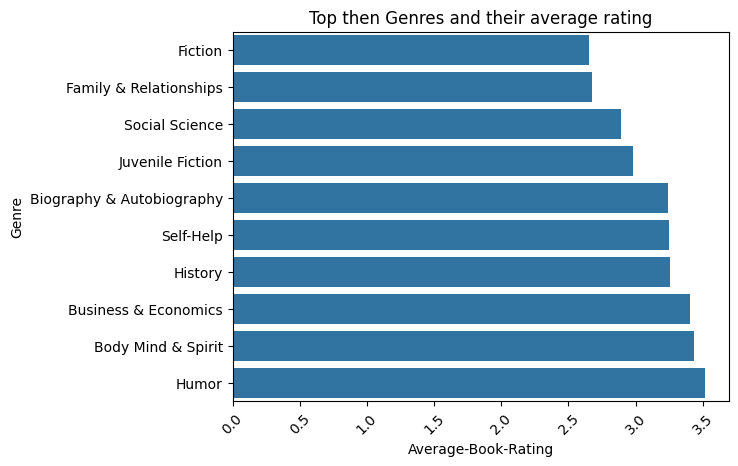

In [57]:
result = result.reset_index()
sns.barplot(data=result, x="Average-Book-Rating", y="Genre")
plt.xticks(rotation=45)
plt.title("Top then Genres and their average rating")
plt.show()



Genres like Humor, Body Mind & Spirit, and Business & Economics tend to receive higher average ratings.In contrast, widely popular genres like Fiction and Juvenile Fiction have relatively lower average ratings, possibly due to higher diversity in reader expectations or volume of ratings.This indicates that reader satisfaction may vary significantly by genre, and less popular or niche genres often receive more favorable feedback